      Video ID     Type        Author Name  \
0  NJcjgcifdIg  Comment       @redwolf9281   
1  NJcjgcifdIg  Comment  @PragyaMundra-v5m   
2  NJcjgcifdIg  Comment           @YT_1989   
3  NJcjgcifdIg    Reply         @studyhall   
4  NJcjgcifdIg    Reply           @YT_1989   

                                 Author URL  \
0       http://www.youtube.com/@redwolf9281   
1  http://www.youtube.com/@PragyaMundra-v5m   
2           http://www.youtube.com/@YT_1989   
3         http://www.youtube.com/@studyhall   
4           http://www.youtube.com/@YT_1989   

                                        Comment Text  Likes  \
0                                       ❤❤❤❤❤❤❤❤❤🎉🎉🎉      0   
1  I LOVED the money money money by ABBA. Thank y...      0   
2  Hi! Would it be better to watch Crash Course E...      0   
3  Both shows assume you are coming in with littl...      0   
4  Thank you so much, this is helpful! So the Eco...      0   

           Published At  
0  2024-12-31T05:21:28Z  
1  2024-1

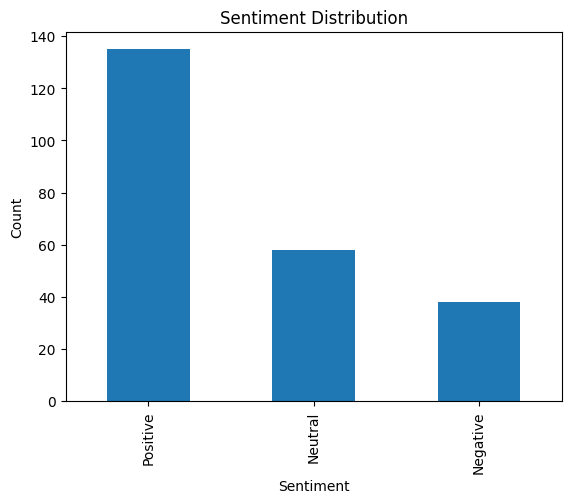

In [ ]:
############################
# STEP 1: Read the CSV
############################

import pandas as pd

# This assumes you have uploaded the CSV to Colab's file system.
# Make sure the filename is exactly the same as what you see in the file list on the left.
df = pd.read_csv("Macroeconomics - YouTube comments - All comments.csv")

# Inspect first few rows
print(df.head())

############################
# STEP 2: Clean the Text
############################

import re

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Strip leading/trailing whitespace
    return text.strip()

# Create a new column "CleanText" by applying the clean_text function
# Make sure to reference the exact column name "Comment Text"
df["CleanText"] = df["Comment Text"].apply(clean_text)

############################
# STEP 3: Install and import TextBlob
############################

!pip install textblob
from textblob import TextBlob

############################
# STEP 4: Calculate sentiment polarity
############################

def get_sentiment_textblob(text):
    # TextBlob returns polarity in the range [-1.0, 1.0]
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Create a new column "Polarity" holding the sentiment scores
df["Polarity"] = df["CleanText"].apply(get_sentiment_textblob)

############################
# STEP 5: Convert polarity scores into discrete sentiments
############################

def categorize_polarity(p):
    if p > 0:
        return "Positive"
    elif p < 0:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["Polarity"].apply(categorize_polarity)

############################
# STEP 6: Inspect the results
############################

print("\n--- SAMPLE RESULTS ---\n")
print(df[["Comment Text", "CleanText", "Polarity", "Sentiment"]].head(10))

############################
# STEP 7: Visualize the distribution
############################

import matplotlib.pyplot as plt

df["Sentiment"].value_counts().plot(kind="bar")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()
